# 0. CARREGAMENTO E IMPORTAÇÃO DAS BIBLIOTECAS

In [ ]:
install.packages(c("dplyr", "ggplot2", "readr", "tidyr", "ggcorrplot", "psych"))
install.packages("psych", repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
install.packages("gridExtra", repos = "http://cran.us.r-project.org")
install.packages("stringr", repos = "http://cran.us.r-project.org")
library(readr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggcorrplot)
library(lubridate)
library(psych)
library(corrplot)
library(gridExtra)
library(knitr)
library(broom)
library(stringr)
library(scales)
library(tidyverse)
library(reshape2)
# Configuração de tema para gráficos
theme_custom <- theme_minimal() + theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5),
    axis.title = element_text(size = 11, face = "bold"),
    axis.text = element_text(size = 10),
    legend.title = element_text(size = 11, face = "bold"),
    legend.text = element_text(size = 10),
    strip.text = element_text(size = 11, face = "bold")
  )

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 1. CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS

In [ ]:
df <- read_csv('/content/dados_saude_habitos - dados_saude_habitos.csv')

print("=== ESTRUTURA DOS DADOS ===")
str(df)

print("=== DIMENSÕES DO DATASET ===")
cat("Número de observações:", nrow(df), "\n")
cat("Número de variáveis:", ncol(df), "\n")

print("=== PRIMEIRAS OBSERVAÇÕES ===")
head(df, 10)

print("=== ESTATÍSTICAS DESCRITIVAS ===")
summary(df)

print("=== VISÃO GERAL DAS VARIÁVEIS ===")
glimpse(df)

Rows: 1000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sexo, Fumante, Nivel_Atividade, Horas_Sono, Historico_Doenca, Cons...
dbl  (6): ID_Paciente, Idade, Peso_kg, Altura_cm, Pressao_Sistolica, Pressao...
date (1): Data_Exame

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "=== ESTRUTURA DOS DADOS ==="
spc_tbl_ [1,000 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID_Paciente              : num [1:1000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Idade                    : num [1:1000] 45 55 61 43 60 65 46 64 33 76 ...
 $ Sexo                     : chr [1:1000] "F" "M" "F" "M" ...
 $ Peso_kg                  : num [1:1000] 74.1 70.7 57.4 75.7 53.2 ...
 $ Altura_cm                : num [1:1000] 172 182 172 191 172 ...
 $ Fumante                  : chr [1:1000] "Sim" "Não" "Não" "Não" ...
 $ Nivel_Atividade          : chr [1:1000] "Sedentário" "Baixo" "Alto" "Moderado" ...
 $ Horas_Sono               : chr [1:1000] "5.1" "4.0" "4.3" "9.2" ...
 $ Pressao_Sistolica        : num [1:1000] 106 135 112 133 134 110 NA 116 111 117 ...
 $ Pressao_Diastolica       : num [1:1000] 78 76 99 73 79 95 90 81 72 72 ...
 $ Historico_Doenca         : chr [1:1000] "nao" "nao" "S" "S" ...
 $ Consumo_Alcool_semanal_ml: chr [1:1000] "134.93" "440.33" "56.91" "86.24" ...
 $ Data_Exame     

ID_Paciente,Idade,Sexo,Peso_kg,Altura_cm,Fumante,Nivel_Atividade,Horas_Sono,Pressao_Sistolica,Pressao_Diastolica,Historico_Doenca,Consumo_Alcool_semanal_ml,Data_Exame
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<date>
1,45,F,74.07,172.26,Sim,Sedentário,5.1,106,78,nao,134.93,2024-04-05
2,55,M,70.72,181.97,Não,Baixo,4.0,135,76,nao,440.33,2024-04-22
3,61,F,57.41,171.51,Não,Alto,4.3,112,99,S,56.91,2024-03-21
4,43,M,75.72,191.34,Não,Moderado,9.2,133,73,S,86.24,2024-02-04
5,60,M,53.16,171.56,Não,Moderado,6.7,134,79,nao,5.32,2024-10-25
6,65,F,88.87,171.91,Sim,Baixo,5.0,110,95,Não Informado,101.58,2023-02-11
7,46,M,73.19,147.00,Não,Baixo,7.694.403.798.926.630,NA,90,nao,492.17,2024-09-24
8,64,M,69.40,171.13,Não,Moderado,9.6,116,81,nao,6.9,2024-06-18
9,33,Masculino,46.34,157.85,Não,Baixo,7.5,111,72,nao,56.34,2023-05-05


[1] "=== ESTATÍSTICAS DESCRITIVAS ==="


  ID_Paciente         Idade           Sexo              Peso_kg      
 Min.   :   1.0   Min.   :18.00   Length:1000        Min.   : 28.64  
 1st Qu.: 250.8   1st Qu.:33.00   Class :character   1st Qu.: 60.81  
 Median : 500.5   Median :50.00   Mode  :character   Median : 70.69  
 Mean   : 500.5   Mean   :49.03                      Mean   : 70.79  
 3rd Qu.: 750.2   3rd Qu.:63.00                      3rd Qu.: 80.80  
 Max.   :1000.0   Max.   :79.00                      Max.   :118.77  
                                                                     
   Altura_cm       Fumante          Nivel_Atividade     Horas_Sono       
 Min.   :135.4   Length:1000        Length:1000        Length:1000       
 1st Qu.:163.6   Class :character   Class :character   Class :character  
 Median :169.9   Mode  :character   Mode  :character   Mode  :character  
 Mean   :169.9                                                           
 3rd Qu.:176.4                                                        

[1] "=== VISÃO GERAL DAS VARIÁVEIS ==="
Rows: 1,000
Columns: 13
$ ID_Paciente               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…
$ Idade                     <dbl> 45, 55, 61, 43, 60, 65, 46, 64, 33, 76, 70, …
$ Sexo                      <chr> "F", "M", "F", "M", "M", "F", "M", "M", "Mas…
$ Peso_kg                   <dbl> 74.07, 70.72, 57.41, 75.72, 53.16, 88.87, 73…
$ Altura_cm                 <dbl> 172.26, 181.97, 171.51, 191.34, 171.56, 171.…
$ Fumante                   <chr> "Sim", "Não", "Não", "Não", "Não", "Sim", "N…
$ Nivel_Atividade           <chr> "Sedentário", "Baixo", "Alto", "Moderado", "…
$ Horas_Sono                <chr> "5.1", "4.0", "4.3", "9.2", "6.7", "5.0", "7…
$ Pressao_Sistolica         <dbl> 106, 135, 112, 133, 134, 110, NA, 116, 111, …
$ Pressao_Diastolica        <dbl> 78, 76, 99, 73, 79, 95, 90, 81, 72, 72, 66, …
$ Historico_Doenca          <chr> "nao", "nao", "S", "S", "nao", "Não Informad…
$ Consumo_Alcool_semanal_ml <chr> "134.93", "440.33", "5

# 2. TRATAMENTO E LIMPEZA DOS DADOS

Preparar os dados, corrigindo problemas e padronizando valores.

In [ ]:
# IDENTIFICAÇÃO E QUANTIFICAÇÃO DE VALORES AUSENTES (NA)

print("=== ANÁLISE DE VALORES FALTANTES ANTES DO TRATAMENTO ===")
missing_summary <- df %>%
  summarise_all(~sum(is.na(.))) %>%
  gather(key = "variavel", value = "valores_faltantes") %>%
  mutate(percentual = round((valores_faltantes / nrow(df)) * 100, 2)) %>%
  filter(valores_faltantes > 0) %>%
  arrange(desc(valores_faltantes))

print(missing_summary)

# LIMPEZA E PADRONIZAÇÃO DOS DADOS

# Conversão de Colunas de Datas
df <- df %>%
  mutate(Data_Exame = as_date(Data_Exame))

df <- df %>%
  mutate(
    # Padroniza a coluna 'Sexo'
    Sexo = str_trim(Sexo), # Remove espaços antes/depois
    Sexo = case_when(
      toupper(Sexo) %in% c("F", "FEMININO") ~ "Feminino",
      toupper(Sexo) %in% c("M", "MASCULINO") ~ "Masculino",
      TRUE ~ NA_character_ # Se houver outro valor, marca como NA para tratar depois
    ),

    # Padroniza a coluna 'Historico_Doenca'
    Historico_Doenca = str_trim(Historico_Doenca),
    Historico_Doenca = case_when(
      toupper(Historico_Doenca) %in% c("S", "SIM") ~ "Sim",
      toupper(Historico_Doenca) %in% c("NAO", "NÃO") ~ "Não",
      TRUE ~ NA_character_
    ),

    # Garante capitalização consistente em 'Nivel_Atividade'
    Nivel_Atividade = str_to_title(Nivel_Atividade),

    # Garante capitalização consistente em 'Fumante'
    Fumante = str_to_title(Fumante),

    # Trata o valor incorreto em Horas_Sono antes de converter para numérico
    # Convert Horas_Sono to numeric first, coercing errors to NA, then filter outliers
    Horas_Sono = as.numeric(Horas_Sono, errors = "coerce"),
    Horas_Sono = ifelse(Horas_Sono > 23, NA, Horas_Sono), # Assuming > 23 hours is an outlier

    # Tratar valores incorretos para consumo de alcool
    # Convert Consumo_Alcool_semanal_ml to numeric first, coercing errors to NA, then filter outliers
    Consumo_Alcool_semanal_ml = as.numeric(Consumo_Alcool_semanal_ml, errors = "coerce"),
    Consumo_Alcool_semanal_ml = ifelse(Consumo_Alcool_semanal_ml > 100000, NA, Consumo_Alcool_semanal_ml) # Assuming > 100000ml is an outlier
  )

[1] "=== ANÁLISE DE VALORES FALTANTES ANTES DO TRATAMENTO ==="
# A tibble: 3 × 3
  variavel           valores_faltantes percentual
  <chr>                          <int>      <dbl>
1 Fumante                           93        9.3
2 Pressao_Sistolica                 50        5  
3 Pressao_Diastolica                50        5  


Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Horas_Sono = as.numeric(Horas_Sono, errors = "coerce")`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


### TRATAMENTO DE VALORES AUSENTES
##### **JUSTIFICATIVA DAS ESCOLHAS**
Variáveis Numéricas ('Horas_Sono', 'Consumo_Alcool_semanal_ml'):
  - Estratégia: Imputação pela MEDIANA.
  - Justificativa: A mediana é uma medida de tendência central robusta a outliers
    (valores extremos). Em dados de saúde, variáveis como consumo de álcool
    podem ser muito assimétricas, e usar a média seria inadequado, pois ela
    é sensível a esses extremos. A mediana representa melhor o "valor típico"
    da amostra.

Variáveis Categóricas ('Fumante'):
  - Estratégia: Imputação pela MODA (o valor mais frequente).
  - Justificativa: Atribuir o valor mais comum é uma forma de preencher a lacuna
    sem introduzir uma nova categoria (como "Desconhecido") e mantendo a
    distribuição de probabilidade original da variável.

In [ ]:
# Total de valores ausentes
print(paste("Total de valores ausentes antes da imputação:", sum(is.na(df))))

# Função para calcular a moda (valor mais frequente)
get_mode <- function(x) {
  ux <- unique(na.omit(x))
  if (length(ux) == 0) return(NA) # Handle case with only NAs
  ux[which.max(tabulate(match(x, ux)))]
}

# Imputação dos NAs
df <- df %>%
  mutate(
    # Imputa numéricas com a mediana
    Horas_Sono = ifelse(is.na(Horas_Sono), median(Horas_Sono, na.rm = TRUE), Horas_Sono),
    Consumo_Alcool_semanal_ml = ifelse(is.na(Consumo_Alcool_semanal_ml), median(Consumo_Alcool_semanal_ml, na.rm = TRUE), Consumo_Alcool_semanal_ml),
    Pressao_Sistolica = ifelse(is.na(Pressao_Sistolica), median(Pressao_Sistolica, na.rm = TRUE), Pressao_Sistolica),
    Pressao_Diastolica = ifelse(is.na(Pressao_Diastolica), median(Pressao_Diastolica, na.rm = TRUE), Pressao_Diastolica),

    # Imputa categóricas com a moda
    Fumante = ifelse(is.na(Fumante), get_mode(Fumante), Fumante),
    Historico_Doenca = ifelse(is.na(Historico_Doenca), get_mode(Historico_Doenca), Historico_Doenca)
  )

# Verifica se ainda existem valores ausentes
print(paste("Total de valores ausentes no dataset final:", sum(is.na(df))))

[1] "Total de valores ausentes antes da imputação: 340"
[1] "Total de valores ausentes no dataset final: 0"


### OUTROS TRATAMENTOS (ENGENHARIA DE VARIÁVEIS)

In [ ]:
# Adicionar coluna IMC
df <- df %>%
  mutate(
    IMC = round(Peso_kg / ((Altura_cm / 100) ^ 2), 2)
  )

### VERIFICAÇÃO FINAL DO TRATAMENTO DE DADOS

In [ ]:
print("=== VERIFICAÇÃO FINAL DOS DADOS ===")

# Mostra a estrutura final do dataframe
print("Estrutura do dataframe após o tratamento:")
glimpse(df)

[1] "=== VERIFICAÇÃO FINAL DOS DADOS ==="
[1] "Estrutura do dataframe após o tratamento:"
Rows: 1,000
Columns: 14
$ ID_Paciente               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…
$ Idade                     <dbl> 45, 55, 61, 43, 60, 65, 46, 64, 33, 76, 70, …
$ Sexo                      <chr> "Feminino", "Masculino", "Feminino", "Mascul…
$ Peso_kg                   <dbl> 74.07, 70.72, 57.41, 75.72, 53.16, 88.87, 73…
$ Altura_cm                 <dbl> 172.26, 181.97, 171.51, 191.34, 171.56, 171.…
$ Fumante                   <chr> "Sim", "Não", "Não", "Não", "Não", "Sim", "N…
$ Nivel_Atividade           <chr> "Sedentário", "Baixo", "Alto", "Moderado", "…
$ Horas_Sono                <dbl> 5.1, 4.0, 4.3, 9.2, 6.7, 5.0, 7.0, 9.6, 7.5,…
$ Pressao_Sistolica         <dbl> 106, 135, 112, 133, 134, 110, 120, 116, 111,…
$ Pressao_Diastolica        <dbl> 78, 76, 99, 73, 79, 95, 90, 81, 72, 72, 66, …
$ Historico_Doenca          <chr> "Não", "Não", "Sim", "Sim", "Não", "Não", "N…
$ Cons

#3 ANÁLISE UNIVARIADA

[1] "=== DISTRIBUIÇÕES DAS VARIÁVEIS PRINCIPAIS ==="


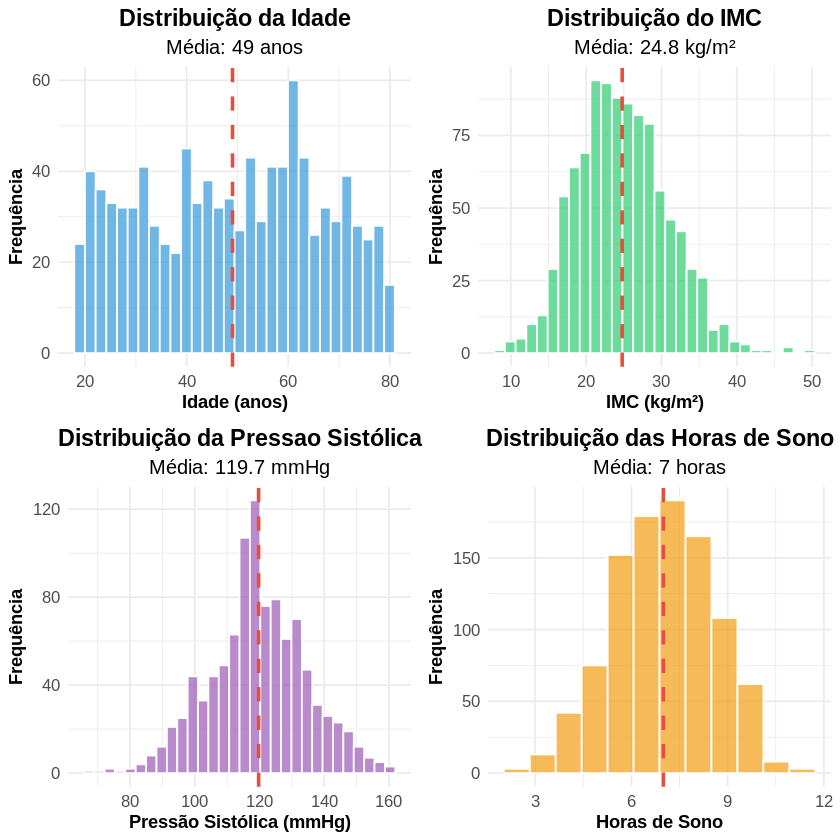

In [ ]:
# ==============================================================================
# 3. ANÁLISE UNIVARIADA
# ==============================================================================

print("=== DISTRIBUIÇÕES DAS VARIÁVEIS PRINCIPAIS ===")

p1 <- ggplot(df, aes(x = Idade)) +
  geom_histogram(bins = 30, fill = "#3498DB", alpha = 0.7, color = "white") +
  geom_vline(aes(xintercept = mean(Idade, na.rm = TRUE)),
             color = "#E74C3C", linetype = "dashed", size = 1) +
  labs(
    title = "Distribuição da Idade",
    subtitle = paste("Média:", round(mean(df$Idade, na.rm = TRUE), 1), "anos"),
    x = "Idade (anos)",
    y = "Frequência"
  ) +
  theme_custom

p2 <- ggplot(df, aes(x = IMC)) +
  geom_histogram(bins = 30, fill = "#2ECC71", alpha = 0.7, color = "white") +
  geom_vline(aes(xintercept = mean(IMC, na.rm = TRUE)),
             color = "#E74C3C", linetype = "dashed", size = 1) +
  labs(
    title = "Distribuição do IMC",
    subtitle = paste("Média:", round(mean(df$IMC, na.rm = TRUE), 1), "kg/m²"),
    x = "IMC (kg/m²)",
    y = "Frequência"
  ) +
  theme_custom

p3 <- ggplot(df, aes(x = Pressao_Sistolica)) +
  geom_histogram(bins = 30, fill = "#9B59B6", alpha = 0.7, color = "white") +
  geom_vline(aes(xintercept = mean(Pressao_Sistolica, na.rm = TRUE)),
             color = "#E74C3C", linetype = "dashed", size = 1) +
  labs(
    title = "Distribuição da Pressao Sistólica",
    subtitle = paste("Média:", round(mean(df$Pressao_Sistolica, na.rm = TRUE), 1), "mmHg"),
    x = "Pressão Sistólica (mmHg)",
    y = "Frequência"
  ) +
  theme_custom

p4 <- ggplot(df, aes(x = Horas_Sono)) +
  geom_histogram(bins = 12, fill = "#F39C12", alpha = 0.7, color = "white") +
  geom_vline(aes(xintercept = mean(Horas_Sono, na.rm = TRUE)),
             color = "#E74C3C", linetype = "dashed", size = 1) +
  labs(
    title = "Distribuição das Horas de Sono",
    subtitle = paste("Média:", round(mean(df$Horas_Sono, na.rm = TRUE), 1), "horas"),
    x = "Horas de Sono",
    y = "Frequência"
  ) +
  theme_custom

grid.arrange(p1, p2, p3, p4, ncol = 2)

# Distribuições das variáveis categóricas
cat_vars <- c("Sexo", "Fumante", "Nivel_Atividade")

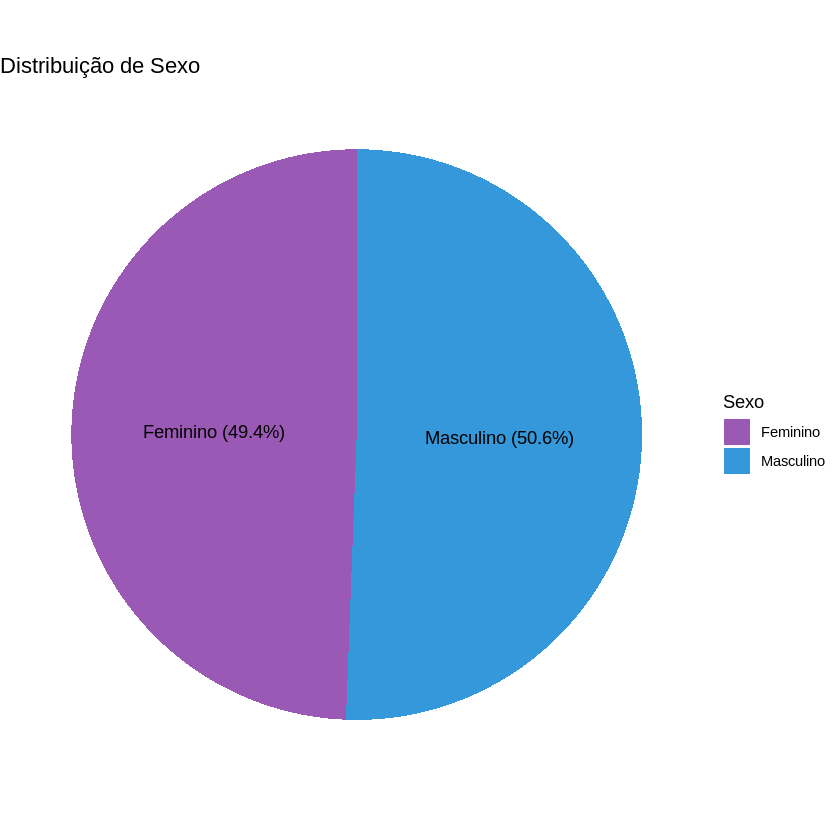

In [ ]:
# ==============================
# GRÁFICO DE PIZZA - SEXO
# ==============================
df %>%
  count(Sexo) %>%
  mutate(perc = n / sum(n) * 100,
         label = paste0(Sexo, " (", round(perc, 1), "%)")) %>%
  ggplot(aes(x = "", y = perc, fill = Sexo)) +
  geom_col(width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribuição de Sexo") +
  theme_void() +
  scale_fill_manual(values = c("Feminino" = "#9B59B6", "Masculino" = "#3498DB"))

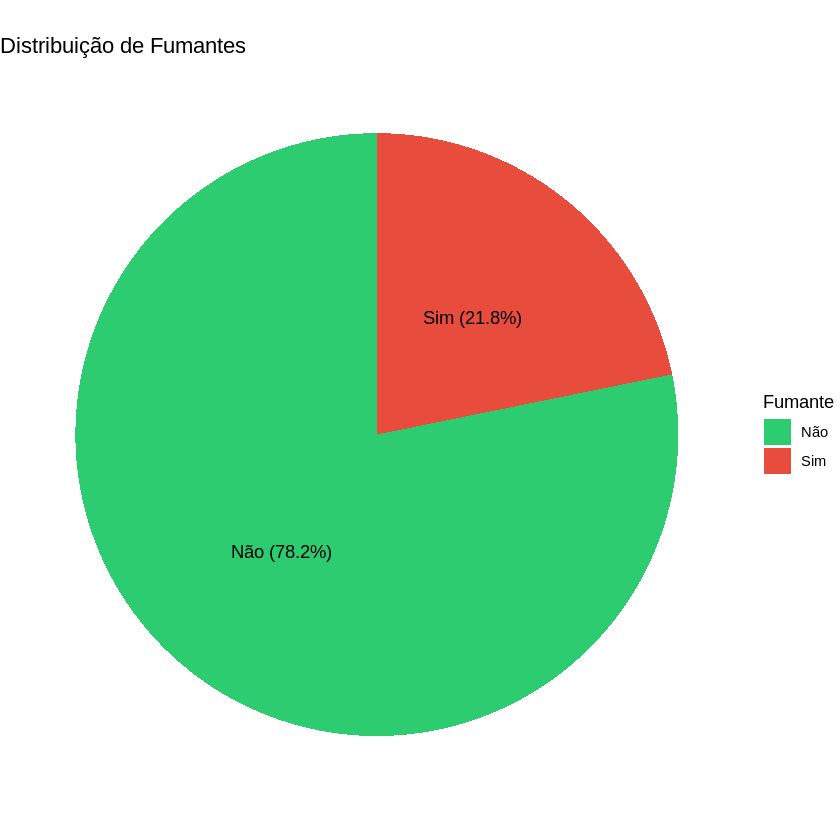

In [ ]:
# ==============================
# GRÁFICO DE PIZZA - FUMANTE
# ==============================
df %>%
  count(Fumante) %>%
  mutate(perc = n / sum(n) * 100,
         label = paste0(Fumante, " (", round(perc, 1), "%)")) %>%
  ggplot(aes(x = "", y = perc, fill = Fumante)) +
  geom_col(width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribuição de Fumantes") +
  theme_void() +
  scale_fill_manual(values = c("Não" = "#2ECC71", "Sim" = "#E74C3C"))

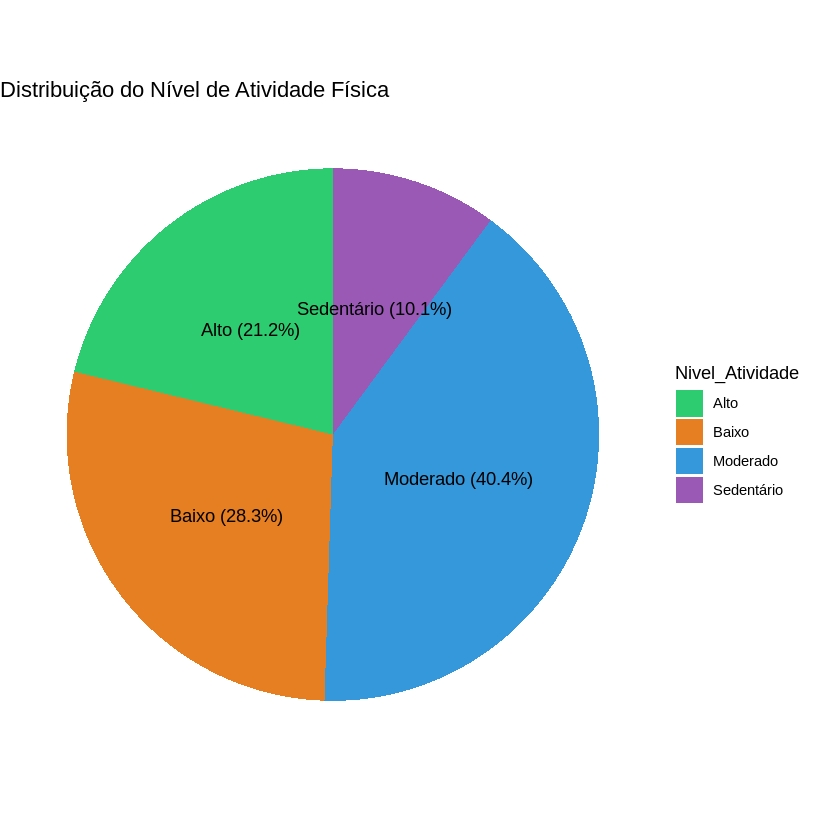

In [ ]:
# ==============================
# GRÁFICO DE PIZZA - NÍVEL DE ATIVIDADE
# ==============================
df %>%
  count(Nivel_Atividade) %>%
  mutate(perc = n / sum(n) * 100,
         label = paste0(Nivel_Atividade, " (", round(perc, 1), "%)")) %>%
  ggplot(aes(x = "", y = perc, fill = Nivel_Atividade)) +
  geom_col(width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribuição do Nível de Atividade Física") +
  theme_void() +
  scale_fill_manual(values = c(
    "Alto" = "#2ECC71",
    "Baixo" = "#E67E22",
    "Moderado" = "#3498DB",
    "Sedentário" = "#9B59B6"
  ))

#4 ANÁLISE BIVARIADA

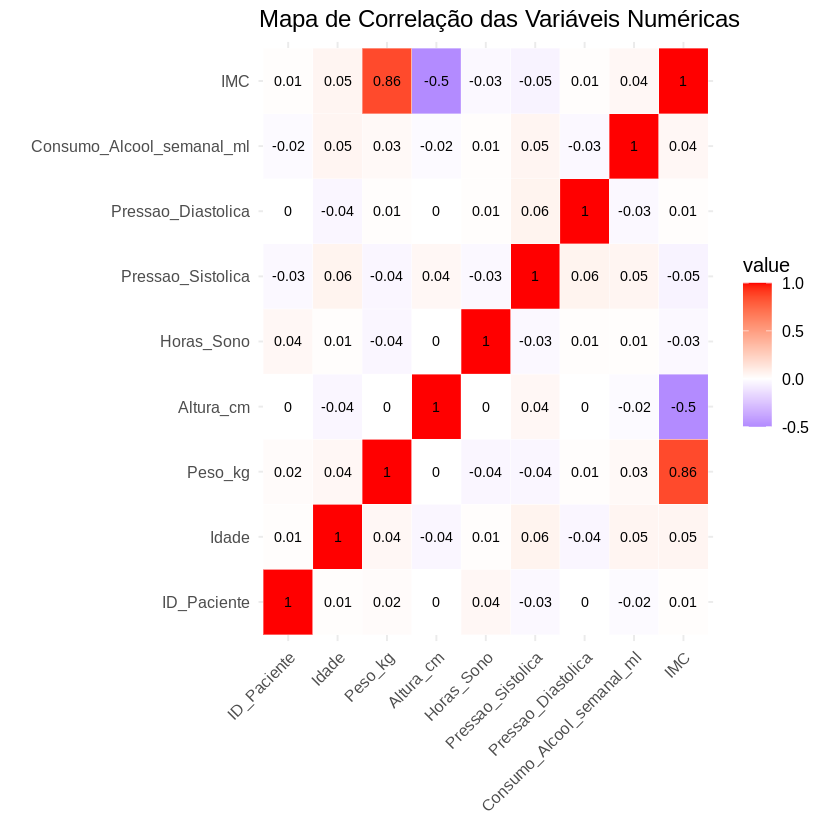

In [ ]:
# Selecionando apenas variáveis numéricas com variância > 0
nums <- df %>%
  select_if(is.numeric) %>%
  select_if(~ sd(., na.rm = TRUE) > 0)

# Calculando matriz de correlação (com par observável completo)
corr <- round(cor(nums, use = "pairwise.complete.obs"), 2)
melted <- melt(corr, varnames = c("Var1", "Var2"), value.name = "value")

ggplot(melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = value), size = 3) +
  labs(
    title = "Mapa de Correlação das Variáveis Numéricas",
    x = NULL,
    y = NULL
  ) +
  theme_minimal(base_size = 12) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


#5 ANÁLISES ESPECÍFICAS POR HIPÓTESES

[1] "=== ANÁLISE 1: RELAÇÃO ENTRE TABAGISMO E PRESSÃO ARTERIAL ==="
# A tibble: 2 × 5
  Fumante     n media_pressao mediana_pressao dp_pressao
  <chr>   <int>         <dbl>           <dbl>      <dbl>
1 Não       782          120.             120       15.2
2 Sim       218          118.             119       13.9
[1] "Teste t para diferença de médias:"
# A tibble: 1 × 10
  estimate estimate1 estimate2 statistic p.value parameter conf.low conf.high
     <dbl>     <dbl>     <dbl>     <dbl>   <dbl>     <dbl>    <dbl>     <dbl>
1     1.60      120.      118.      1.47   0.142      374.   -0.538      3.75
# ℹ 2 more variables: method <chr>, alternative <chr>
[1] "Conclusão: O p-valor não é menor que 0.05. Não temos evidências suficientes para rejeitar a hipótese nula."


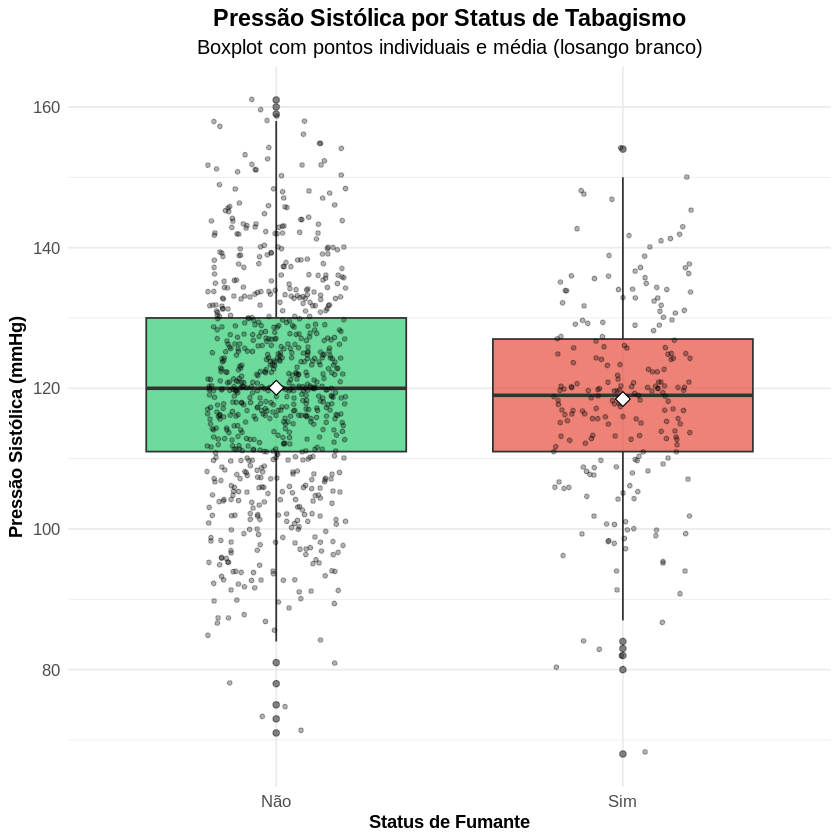

In [ ]:
print("=== ANÁLISE 1: RELAÇÃO ENTRE TABAGISMO E PRESSÃO ARTERIAL ===")

# H0: A média da pressão arterial sistólica é igual entre fumantes e não fumantes
# grafico: boxplot + com pontos individuais (jitter)
# t Student

print(smoking_stats)

p_smoking <- ggplot(df, aes(x = Fumante, y = Pressao_Sistolica, fill = Fumante)) +
  geom_boxplot(alpha = 0.7, outlier.alpha = 0.6) +
  geom_jitter(width = 0.2, alpha = 0.3, size = 1) +
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3, fill = "white") +
  scale_fill_manual(values = c("Não" = "#2ECC71", "Sim" = "#E74C3C")) +
  labs(
    title = "Pressão Sistólica por Status de Tabagismo",
    subtitle = "Boxplot com pontos individuais e média (losango branco)",
    x = "Status de Fumante",
    y = "Pressão Sistólica (mmHg)"
  ) +
  theme_custom +
  theme(legend.position = "none")

print(p_smoking)

t_test_smoking <- t.test(Pressao_Sistolica ~ Fumante, data = df)
print("Teste t para diferença de médias:")
print(tidy(t_test_smoking))

# interpretação do resultado
p_value_t_test <- tidy(t_test_smoking)$p.value
if (p_value_t_test < 0.05) { # alfa 0.05
  print("Conclusão: O p-valor é menor que 0.05. Rejeitamos a hipótese nula. Existe uma diferença estatisticamente significativa.")
} else {
  print("Conclusão: O p-valor não é menor que 0.05. Não temos evidências suficientes para rejeitar a hipótese nula.")
}

[1] "=== ANÁLISE: RELAÇÃO ENTRE HORAS DE SONO E PRESSÃO ARTERIAL ==="


`geom_smooth()` using formula = 'y ~ x'



--- Resultados do Teste de Correlação ---
Correlação de Pearson (r): 0.0019 
P-valor: 0.9523 
Intervalo de Confiança (95%): [ -0.0601 ,  0.0639 ]

[1] "--- Interpretação da Hipótese ---"
[1] "Conclusão: O p-valor (0.9523) não é menor que o nível de significância (0.05)."
[1] "Portanto, NÃO HÁ EVIDÊNCIAS PARA REJEITAR a Hipótese Nula."
[1] "Não podemos afirmar que existe uma correlação linear entre as horas de sono e a pressão sistólica com base nestes dados."


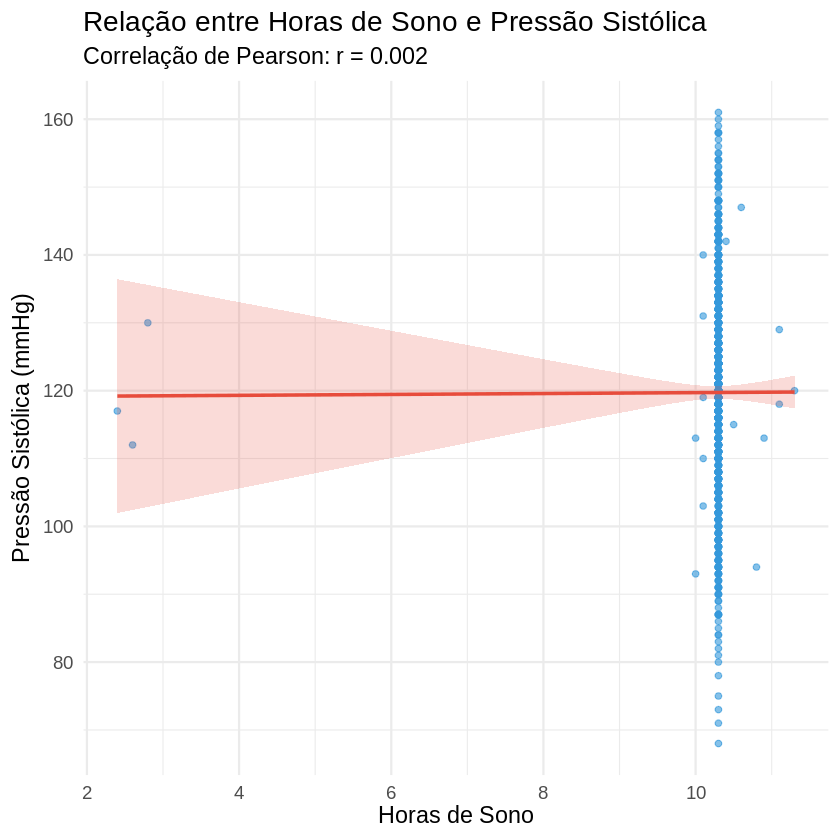

In [ ]:
print("=== ANÁLISE: RELAÇÃO ENTRE HORAS DE SONO E PRESSÃO ARTERIAL ===")

# H0: Não existe uma correlação linear entre o número de horas de sono e o nível da pressão sistólica
# grafico: Dispersão com Linha de Regressão (point + smooth)
# correlação de Pearson

if(nrow(df_sleep) > 0 && is.numeric(df_sleep$Horas_Sono) && is.numeric(df_sleep$Pressao_Sistolica)) {

  # Calcular o coeficiente de correlação
  sleep_correlation <- cor(df_sleep$Horas_Sono, df_sleep$Pressao_Sistolica, use = "complete.obs")

  # Gerar o gráfico de dispersão com linha de tendência
  p_sleep <- ggplot(df_sleep, aes(x = Horas_Sono, y = Pressao_Sistolica)) +
    geom_point(alpha = 0.6, color = "#3498DB") +
    geom_smooth(method = "lm", se = TRUE, color = "#E74C3C", fill = "#E74C3C", alpha = 0.2) +
    labs(
      title = "Relação entre Horas de Sono e Pressão Sistólica",
      subtitle = paste("Correlação de Pearson: r =", round(sleep_correlation, 3)),
      x = "Horas de Sono",
      y = "Pressão Sistólica (mmHg)"
    ) +
    theme_minimal(base_size = 14)

  print(p_sleep)

  # realizar teste
  cor_test_sleep <- cor.test(df_sleep$Horas_Sono, df_sleep$Pressao_Sistolica)
  cor_results <- tidy(cor_test_sleep)

  # Imprimir os resultados detalhados do teste
  cat("\n--- Resultados do Teste de Correlação ---\n")
  cat("Correlação de Pearson (r):", round(cor_results$estimate, 4), "\n")
  cat("P-valor:", format.pval(cor_results$p.value, digits = 4), "\n")
  cat("Intervalo de Confiança (95%): [", round(cor_results$conf.low, 4), ", ", round(cor_results$conf.high, 4), "]\n\n")

  # interpretação
  p_valor <- cor_results$p.value
  coef_correlacao <- cor_results$estimate
  alfa <- 0.05 # alfa 0.5

  print("--- Interpretação da Hipótese ---")

  if (p_valor < alfa) {
    print(paste("Conclusão: O p-valor (", format.pval(p_valor, digits=4), ") é menor que o nível de significância (", alfa, ").", sep = ""))
    print("Portanto, REJEITAMOS a Hipótese Nula.")

    if (coef_correlacao > 0) {
      print("Existe uma correlação linear POSITIVA estatisticamente significativa entre as horas de sono e a pressão sistólica.")
    } else {
      print("Existe uma correlação linear NEGATIVA estatisticamente significativa entre as horas de sono e a pressão sistólica.")
    }

  } else {
    print(paste("Conclusão: O p-valor (", format.pval(p_valor, digits=4), ") não é menor que o nível de significância (", alfa, ").", sep = ""))
    print("Portanto, NÃO HÁ EVIDÊNCIAS PARA REJEITAR a Hipótese Nula.")
    print("Não podemos afirmar que existe uma correlação linear entre as horas de sono e a pressão sistólica com base nestes dados.")
  }

} else {
  cat("Dados insuficientes ou inadequados para análise de correlação sono-pressão.\n")
}

[1] "=== ANÁLISE: RELAÇÃO ENTRE ATIVIDADE FÍSICA E IMC ==="
[1] "Tabela de Resultados da Análise de Variância (ANOVA):"
# A tibble: 2 × 6
  term               df   sumsq meansq statistic p.value
  <chr>           <dbl>   <dbl>  <dbl>     <dbl>   <dbl>
1 Nivel_Atividade     3    88.3   29.4     0.813   0.487
2 Residuals         996 36063.    36.2    NA      NA    
[1] "--- Interpretação da Hipótese ---"
[1] "Conclusão: O p-valor (0.48683) não é menor que o nível de significância (0.05)."
[1] "Portanto, NÃO HÁ EVIDÊNCIAS PARA REJEITAR a Hipótese Nula."
[1] "Isto sugere que as diferenças observadas no gráfico podem ser meramente devido ao acaso. Não podemos afirmar que o nível de atividade tem um efeito na média do IMC."


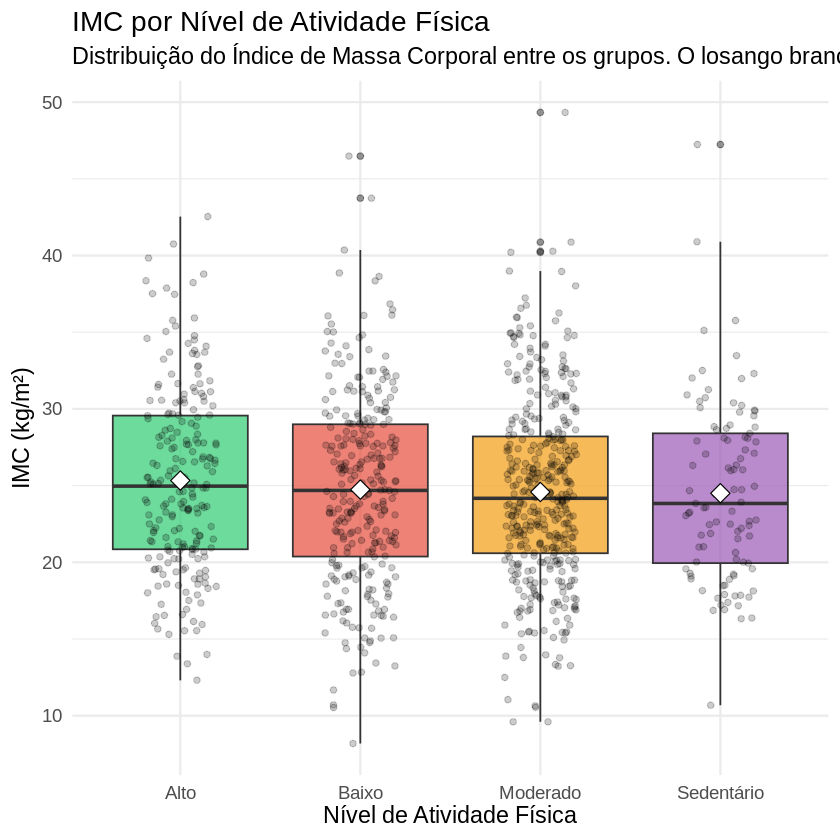

In [ ]:
print("=== ANÁLISE: RELAÇÃO ENTRE ATIVIDADE FÍSICA E IMC ===")

# H0: Não existe diferença entre as médias do IMC nos vários níveis de atividade física
# grafico: boxplot + com pontos individuais (jitter)
# Análise de Variância (ANOVA). O teste de Tukey (TukeyHSD) é aplicado se a ANOVA for significativa.

activity_colors <- c("Alto" = "#2ECC71", "Baixo" = "#E74C3C",
                     "Moderado" = "#F39C12", "Sedentário" = "#9B59B6")

# Criar o boxplot para comparar as distribuições do IMC
p_activity <- ggplot(df_activity, aes(x = Nivel_Atividade, y = IMC, fill = Nivel_Atividade)) +
  geom_boxplot(alpha = 0.7, outlier.alpha = 0.5) +
  geom_jitter(width = 0.2, alpha = 0.2) + # Adiciona pontos para ver a dispersão
  stat_summary(fun = mean, geom = "point", shape = 23, size = 4, fill = "white") + # Adiciona a média
  scale_fill_manual(values = activity_colors) +
  labs(
    title = "IMC por Nível de Atividade Física",
    subtitle = "Distribuição do Índice de Massa Corporal entre os grupos. O losango branco indica a média.",
    x = "Nível de Atividade Física",
    y = "IMC (kg/m²)"
  ) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")

# Imprimir o gráfico
print(p_activity)


anova_activity <- aov(IMC ~ Nivel_Atividade, data = df_activity)
anova_results <- tidy(anova_activity)

print("Tabela de Resultados da Análise de Variância (ANOVA):")
print(anova_results)


p_valor <- anova_results$p.value[1]
alfa <- 0.05

print("--- Interpretação da Hipótese ---")

if (p_valor < alfa) {
  print(paste("Conclusão: O p-valor (", round(p_valor, 5), ") é menor que o nível de significância (", alfa, ").", sep = ""))
  print("Portanto, REJEITAMOS a Hipótese Nula.")
  print("Isto sugere que as diferenças observadas no gráfico são estatisticamente significativas. O nível de atividade física parece ter um efeito real na média do IMC.")

} else {
  print(paste("Conclusão: O p-valor (", round(p_valor, 5), ") não é menor que o nível de significância (", alfa, ").", sep = ""))
  print("Portanto, NÃO HÁ EVIDÊNCIAS PARA REJEITAR a Hipótese Nula.")
  print("Isto sugere que as diferenças observadas no gráfico podem ser meramente devido ao acaso. Não podemos afirmar que o nível de atividade tem um efeito na média do IMC.")
}

#6 ANÁLISE TEMPORAL

--- Destaques da Análise Temporal ---
A média de exames realizados por mês: 41.67
Mês com MAIS exames: April de 2024, com 52 exames.
Mês com MENOS exames: August de 2023, com 30 exames.


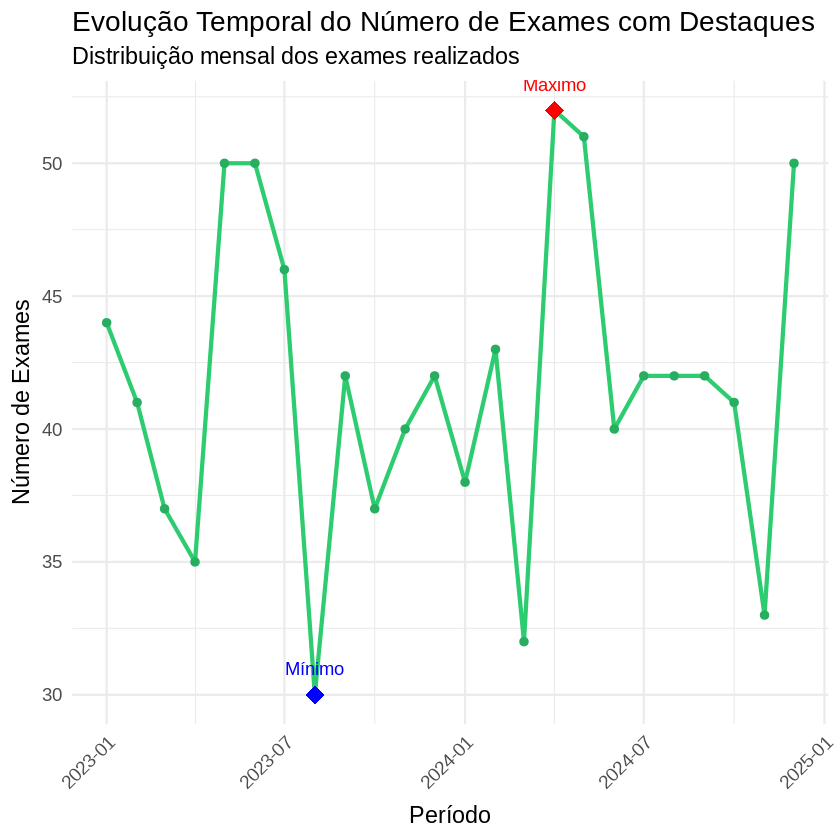

In [ ]:
temporal_data <- df %>%
  mutate(
    Ano_Mes = floor_date(Data_Exame, "month")
  ) %>%
  count(Ano_Mes, name = "num_exames")


# Media de exames por mes
media_mensal_exames <- mean(temporal_data$num_exames)

# Encontra a linha com o número máximo de exames
mes_com_mais_exames <- temporal_data %>%
  filter(num_exames == max(num_exames))

# Encontra a linha com o número mínimo de exames
mes_com_menos_exames <- temporal_data %>%
  filter(num_exames == min(num_exames))


cat("--- Destaques da Análise Temporal ---\n")

cat(sprintf(
  "A média de exames realizados por mês: %.2f\n",
  media_mensal_exames
))
cat(sprintf(
  "Mês com MAIS exames: %s, com %d exames.\n",
  format(mes_com_mais_exames$Ano_Mes, "%B de %Y"),
  mes_com_mais_exames$num_exames
))
cat(sprintf(
  "Mês com MENOS exames: %s, com %d exames.\n",
  format(mes_com_menos_exames$Ano_Mes, "%B de %Y"),
  mes_com_menos_exames$num_exames
))

# visualização
p_temporal_destacado <- ggplot(temporal_data, aes(x = Ano_Mes, y = num_exames)) +
  geom_line(color = "#2ECC71", size = 1.2) +
  geom_point(color = "#27AE60", size = 2) + # Pontos normais

  # maximo
  geom_point(data = mes_com_mais_exames, aes(x = Ano_Mes, y = num_exames),
             color = "red", size = 5, shape = 18) +
  geom_text(data = mes_com_mais_exames, aes(label = "Máximo"), vjust = -1.5, color = "red") +

  # mínimo
  geom_point(data = mes_com_menos_exames, aes(x = Ano_Mes, y = num_exames),
             color = "blue", size = 5, shape = 18) +
  geom_text(data = mes_com_menos_exames, aes(label = "Mínimo"), vjust = -1.5, color = "blue") +


  labs(
    title = "Evolução Temporal do Número de Exames com Destaques",
    subtitle = "Distribuição mensal dos exames realizados",
    x = "Período",
    y = "Número de Exames"
  ) +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


print(p_temporal_destacado)

#7 PERGUNTAS

#7.1 Pergunta 1: Há diferenças significativas no IMC (Índice de Massa Corporal) entre homens e mulheres?

[1] "--- Visualização da Distribuição de IMC por Sexo ---"
[1] "--- Teste t para Diferença de Médias de IMC por Sexo ---"
# A tibble: 1 × 10
  estimate estimate1 estimate2 statistic p.value parameter conf.low conf.high
     <dbl>     <dbl>     <dbl>     <dbl>   <dbl>     <dbl>    <dbl>     <dbl>
1  -0.0474      24.8      24.8    -0.125   0.901      998.   -0.794     0.700
# ℹ 2 more variables: method <chr>, alternative <chr>

--- Conclusão do Teste de Hipótese ---
Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor = 0.9008 ).
Interpretação: Não podemos afirmar que existe uma diferença estatisticamente significativa na média do IMC entre homens e mulheres com base nestes dados.


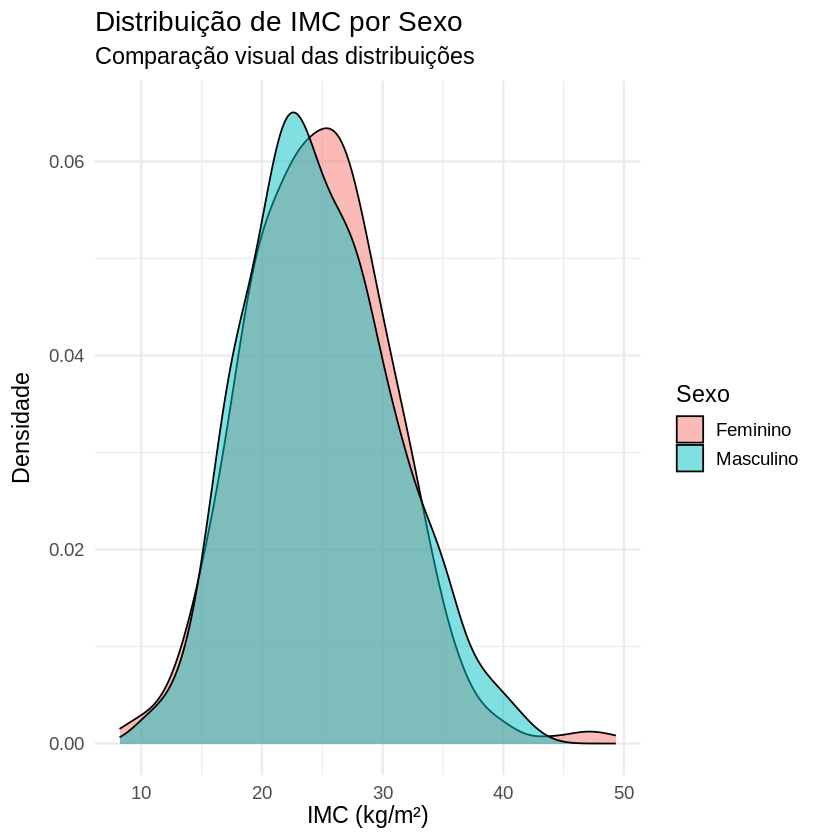

In [ ]:
print("--- Visualização da Distribuição de IMC por Sexo ---")

# H0: Existe uma diferença estatisticamente significativa na média do IMC entre homens e mulheres?
# grafico: Densidade
# t amostras independentes

p_densidade_sexo <- ggplot(df, aes(x = IMC, fill = Sexo)) +
  geom_density(alpha = 0.5) + # alpha 0.5
  labs(
    title = "Distribuição de IMC por Sexo",
    subtitle = "Comparação visual das distribuições",
    x = "IMC (kg/m²)",
    y = "Densidade"
  ) +
  theme_minimal(base_size = 14)

print(p_densidade_sexo)

print("--- Teste t para Diferença de Médias de IMC por Sexo ---")

#  teste
t_test_sexo <- t.test(IMC ~ Sexo, data = df)

#  imprime os resultados
t_results <- tidy(t_test_sexo)
print(t_results)

# interpretação
p_valor <- t_results$p.value
alfa <- 0.05

cat("\n--- Conclusão do Teste de Hipótese ---\n")

if (p_valor < alfa) {
  cat(paste("Decisão: Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Existe uma diferença estatisticamente significativa na média do IMC entre homens e mulheres.\n")
} else {
  cat(paste("Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Não podemos afirmar que existe uma diferença estatisticamente significativa na média do IMC entre homens e mulheres com base nestes dados.\n")
}

#7.2 Pergunta 2: Existe relação entre nível de atividade física e Pressão Sistólica?

[1] "--- Visualização da Pressão Sistólica por Nível de Atividade ---"
[1] "--- Análise de Variância (ANOVA) ---"
# A tibble: 2 × 6
  term               df   sumsq meansq statistic p.value
  <chr>           <dbl>   <dbl>  <dbl>     <dbl>   <dbl>
1 Nivel_Atividade     3    259.   86.4     0.386   0.763
2 Residuals         996 223163.  224.     NA      NA    

--- Conclusão do Teste de Hipótese ---
Decisão da ANOVA: Não há evidências para Rejeitar a Hipótese Nula (p-valor = 0.7633 ).
Interpretação: Não podemos afirmar que existe uma relação estatisticamente significativa entre o nível de atividade e a pressão sistólica com base nestes dados.


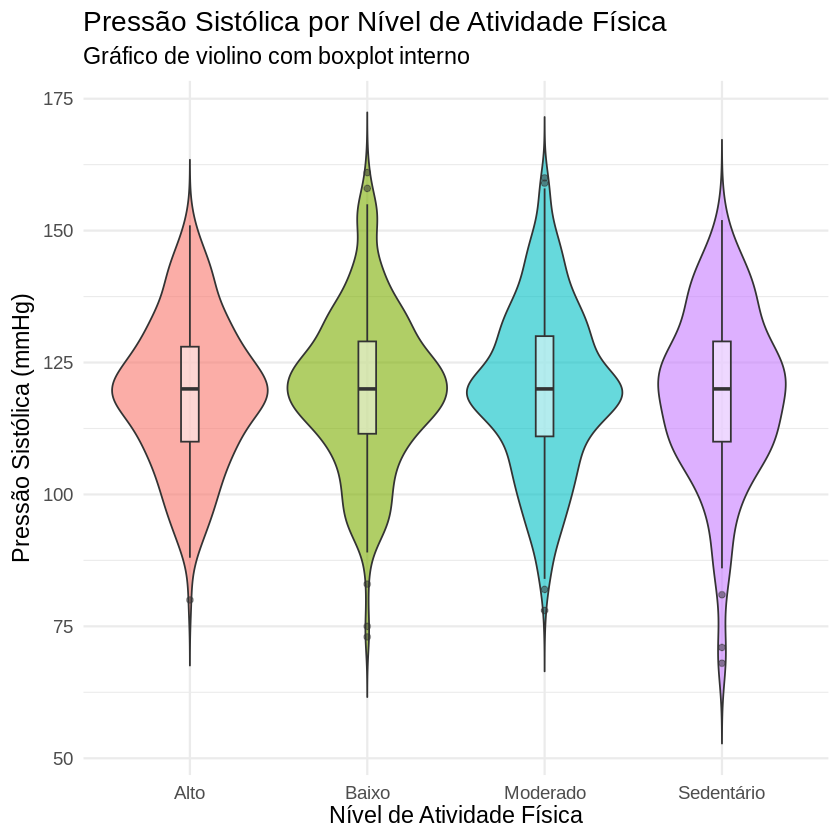

In [ ]:
# H0: As médias de Pressão Sistólica são iguais para todos os Níveis de Atividade?
# grafico: violino com boxplot
# Análise de Variância (ANOVA). O teste de Tukey (TukeyHSD) é aplicado se a ANOVA for significativa.

print("--- Visualização da Pressão Sistólica por Nível de Atividade ---")

p_violino_atividade <- ggplot(df, aes(x = Nivel_Atividade, y = Pressao_Sistolica, fill = Nivel_Atividade)) +
  geom_violin(trim = FALSE, alpha = 0.6) +
  geom_boxplot(width = 0.1, fill = "white", alpha = 0.5) + # Adiciona um boxplot dentro do violino
  labs(
    title = "Pressão Sistólica por Nível de Atividade Física",
    subtitle = "Gráfico de violino com boxplot interno",
    x = "Nível de Atividade Física",
    y = "Pressão Sistólica (mmHg)"
  ) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")

print(p_violino_atividade)

# teste de hipotese geral (ANOVA)
print("--- Análise de Variância (ANOVA) ---")

# A ANOVA verifica se existe alguma diferença significativa entre as médias dos grupos
anova_atividade <- aov(Pressao_Sistolica ~ Nivel_Atividade, data = df)
anova_results <- tidy(anova_atividade)

print(anova_results)


# interpretação e comparação (TUKEY)
p_valor_anova <- anova_results$p.value[1]
alfa <- 0.05

cat("\n--- Conclusão do Teste de Hipótese ---\n")

if (p_valor_anova < alfa) {
  cat(paste("Decisão da ANOVA: Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor_anova, digits = 4), ").\n"))
  cat("Interpretação: Sim, existe uma relação estatisticamente significativa entre o nível de atividade e a pressão sistólica.\n\n")

  # Se a ANOVA é significativa, prosseguimos para o Teste de Tukey
  # para ver quais pares de grupos são diferentes.
  cat("--- Teste de Tukey (Comparações Múltiplas) ---\n")
  cat("O teste abaixo mostra quais pares de grupos específicos têm médias diferentes.\n")
  cat("Procure por 'p adj' (p-valor ajustado) < 0.05.\n\n")

  tukey_results <- TukeyHSD(anova_atividade)
  print(tidy(tukey_results))

} else {
  cat(paste("Decisão da ANOVA: Não há evidências para Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor_anova, digits = 4), ").\n"))
  cat("Interpretação: Não podemos afirmar que existe uma relação estatisticamente significativa entre o nível de atividade e a pressão sistólica com base nestes dados.\n")
}

#7.3 Pergunta 3: A idade influencia no histórico de doença?

[1] "--- Visualização da Distribuição de Idade por Histórico de Doença ---"
[1] "--- Teste t para Diferença de Médias de Idade por Histórico de Doença ---"
# A tibble: 1 × 10
  estimate estimate1 estimate2 statistic p.value parameter conf.low conf.high
     <dbl>     <dbl>     <dbl>     <dbl>   <dbl>     <dbl>    <dbl>     <dbl>
1     1.15      49.3      48.2     0.899   0.369      424.    -1.36      3.66
# ℹ 2 more variables: method <chr>, alternative <chr>

--- Conclusão do Teste de Hipótese ---
Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor = 0.3692 ).
Interpretação: Com base nos dados, não podemos afirmar que a idade média é significativamente diferente entre os grupos com e sem histórico de doença.


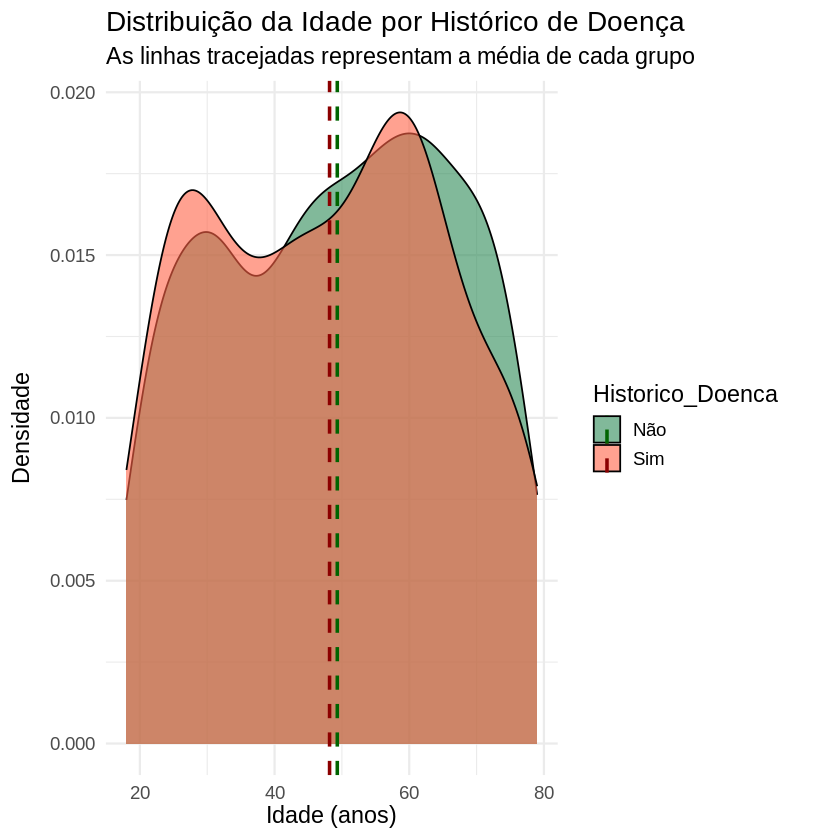

In [ ]:
# H0: A idade média de pessoas com histórico de doença é igual à idade média de pessoas sem histórico de doença?
# grafico: desidade com linhas de media
# t student

print("--- Visualização da Distribuição de Idade por Histórico de Doença ---")

p_idade_doenca <- ggplot(df, aes(x = Idade, fill = Historico_Doenca)) +
  geom_density(alpha = 0.6) + # alpha 0.6 para ver bem a sobreposição
  geom_vline(data = df %>% group_by(Historico_Doenca) %>% summarise(media_idade = mean(Idade)),
             aes(xintercept = media_idade, color = Historico_Doenca),
             linetype = "dashed", size = 1) +
  labs(
    title = "Distribuição da Idade por Histórico de Doença",
    subtitle = "As linhas tracejadas representam a média de cada grupo",
    x = "Idade (anos)",
    y = "Densidade"
  ) +
  scale_fill_manual(values = c("Não" = "seagreen", "Sim" = "tomato")) +
  scale_color_manual(values = c("Não" = "darkgreen", "Sim" = "darkred")) +
  theme_minimal(base_size = 14)

print(p_idade_doenca)


print("--- Teste t para Diferença de Médias de Idade por Histórico de Doença ---")

t_test_idade <- t.test(Idade ~ Historico_Doenca, data = df)

t_results_idade <- tidy(t_test_idade)
print(t_results_idade)


# interpretação
p_valor <- t_results_idade$p.value
media_sim <- t_results_idade$estimate1
media_nao <- t_results_idade$estimate2
alfa <- 0.05

cat("\n--- Conclusão do Teste de Hipótese ---\n")

if (p_valor < alfa) {
  cat(paste("Decisão: Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Sim, existe uma diferença estatisticamente significativa na idade média entre pessoas com e sem histórico de doença.\n")

  # Adiciona um detalhe sobre qual grupo é mais velho
  if (media_sim > media_nao) {
    cat("O grupo com histórico de doença tende a ser mais velho.\n")
  } else {
    cat("O grupo sem histórico de doença tende a ser mais velho.\n")
  }

} else {
  cat(paste("Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Com base nos dados, não podemos afirmar que a idade média é significativamente diferente entre os grupos com e sem histórico de doença.\n")
}

#7.4 Pergunta 4: Fumantes têm maior prevalência de doenças crônicas?


[1] "--- Visualização da Prevalência de Doença por Tabagismo ---"
[1] "--- Teste Qui-Quadrado de Independência ---"
[1] "Tabela de Contingência (Contagens):"
     
      Não Sim
  Não 587 195
  Sim 162  56
[1] "Resultados do Teste:"
# A tibble: 1 × 4
  statistic p.value parameter method                                            
      <dbl>   <dbl>     <int> <chr>                                             
1    0.0191   0.890         1 Pearson's Chi-squared test with Yates' continuity…

--- Conclusão do Teste de Hipótese ---
Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor = 0.8901 ).
Interpretação: Com base nos dados, não podemos afirmar que existe uma associação entre ser fumante e ter um histórico de doença crônica.


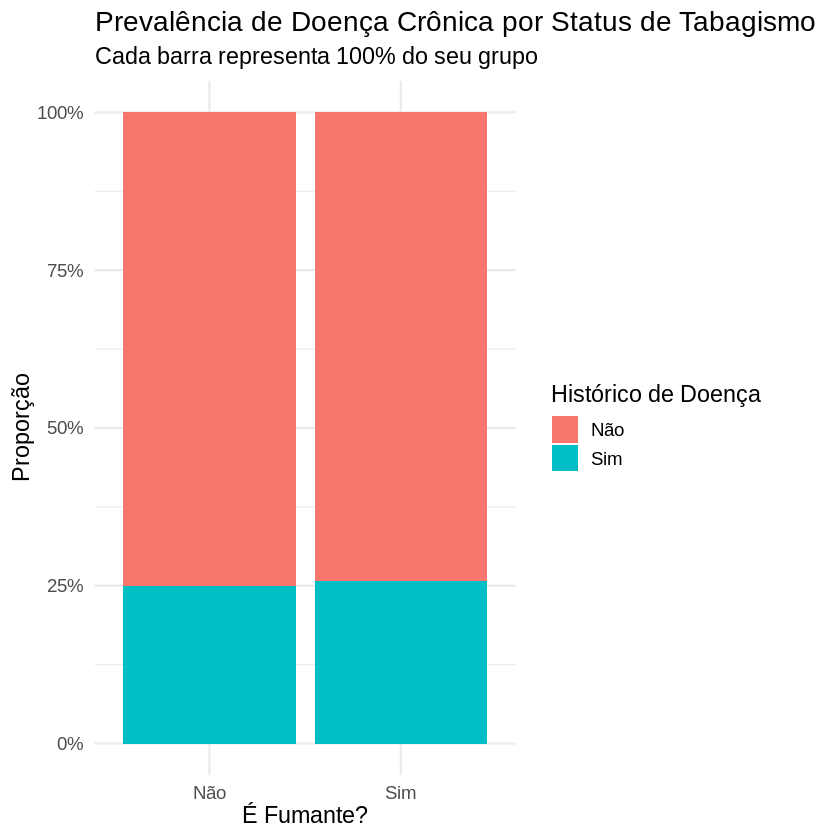

In [ ]:
# H0: Ser fumante e ter um histórico de doença são eventos independentes.
#     Não existe associação entre eles (a prevalência da doença é a mesma para
#     fumantes e não fumantes).
# grafico: grafico de barras verticais empilhadas
# teste chi quadrado

print("--- Visualização da Prevalência de Doença por Tabagismo ---")

p_proporcao_doenca <- ggplot(df, aes(x = Fumante, fill = Historico_Doenca)) +
  geom_bar(position = "fill") +
  labs(
    title = "Prevalência de Doença Crônica por Status de Tabagismo",
    subtitle = "Cada barra representa 100% do seu grupo",
    x = "É Fumante?",
    y = "Proporção",
    fill = "Histórico de Doença"
  ) +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal(base_size = 14)

print(p_proporcao_doenca)


print("--- Teste Qui-Quadrado de Independência ---")

tabela_contingencia <- table(df$Fumante, df$Historico_Doenca)
print("Tabela de Contingência (Contagens):")
print(tabela_contingencia)

teste_qui2 <- chisq.test(tabela_contingencia)
teste_results <- tidy(teste_qui2)

print("Resultados do Teste:")
print(teste_results)

# interpretação
p_valor <- teste_results$p.value
alfa <- 0.05

cat("\n--- Conclusão do Teste de Hipótese ---\n")

if (p_valor < alfa) {
  cat(paste("Decisão: Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Sim, existe uma associação estatisticamente significativa entre ser fumante e ter um histórico de doença crônica.\n")
  cat("Isso confirma que a diferença na prevalência vista no gráfico é real.\n")
} else {
  cat(paste("Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Com base nos dados, não podemos afirmar que existe uma associação entre ser fumante e ter um histórico de doença crônica.\n")
}

#7.5 Pergunta 5: Há relação entre as horas de sono e a pressão sistólica?

[1] "--- Visualização da Relação entre Sono e Pressão Sistólica ---"


`geom_smooth()` using formula = 'y ~ x'


[1] "--- Teste de Correlação de Pearson ---"
Coeficiente de Correlação (r): -0.0303 
P-valor: 0.339 

--- Conclusão do Teste de Hipótese ---
Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor = 0.339 ).
Interpretação: Com base nos dados, não podemos afirmar que existe uma relação linear entre as horas de sono e a pressão sistólica.


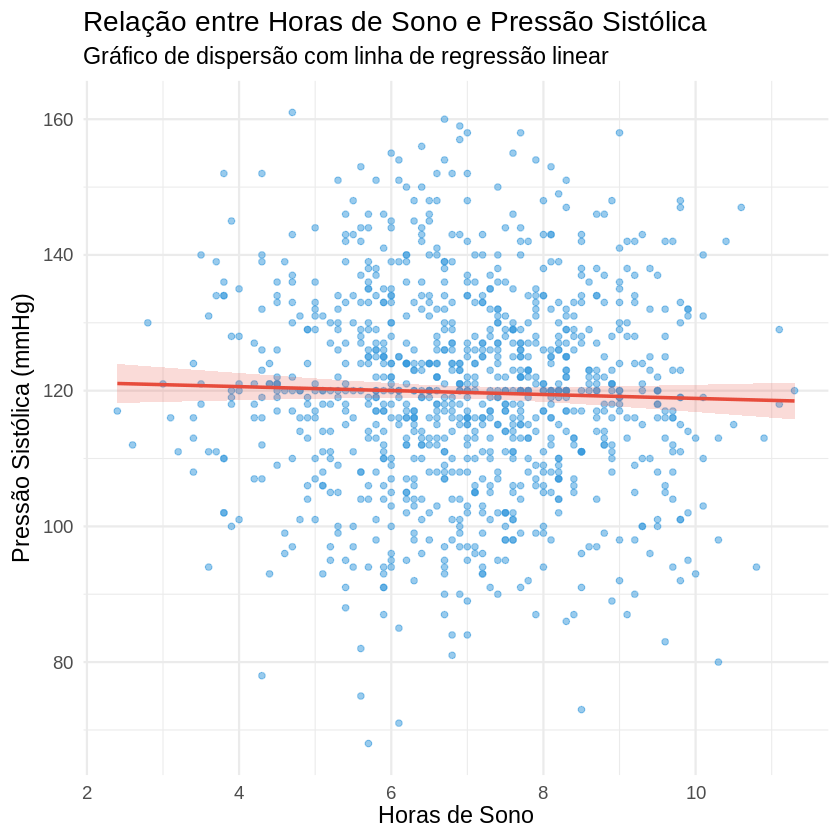

In [ ]:
# H0: Não existe correlação linear entre as horas de sono e a pressão sistólica
#     na população. O coeficiente de correlação é 0
# grafico: grafico de dispersão com linha de regressão
# teste de correlação de Pearson

print("--- Visualização da Relação entre Sono e Pressão Sistólica ---")

p_sono_pressao <- ggplot(df, aes(x = Horas_Sono, y = Pressao_Sistolica)) +
  geom_point(alpha = 0.5, color = "#3498DB") +
  geom_smooth(method = "lm", se = TRUE, color = "#E74C3C", fill = "#E74C3C", alpha = 0.2) +
  labs(
    title = "Relação entre Horas de Sono e Pressão Sistólica",
    subtitle = "Gráfico de dispersão com linha de regressão linear",
    x = "Horas de Sono",
    y = "Pressão Sistólica (mmHg)"
  ) +
  theme_minimal(base_size = 14)

print(p_sono_pressao)

print("--- Teste de Correlação de Pearson ---")

# Realiza o teste
cor_test_sono <- cor.test(df$Horas_Sono, df$Pressao_Sistolica)
cor_results <- tidy(cor_test_sono)

# Imprime os resultados teste
cat("Coeficiente de Correlação (r):", round(cor_results$estimate, 4), "\n")
cat("P-valor:", format.pval(cor_results$p.value, digits = 4), "\n\n")


# interpretação
p_valor <- cor_results$p.value
coef_correlacao <- cor_results$estimate
alfa <- 0.05

cat("--- Conclusão do Teste de Hipótese ---\n")

if (p_valor < alfa) {
  cat(paste("Decisão: Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Sim, existe uma relação linear estatisticamente significativa entre as horas de sono e a pressão sistólica.\n")

  if (coef_correlacao > 0) {
    cat("A correlação é POSITIVA, indicando que mais horas de sono estão associadas a uma maior pressão sistólica.\n")
  } else {
    cat("A correlação é NEGATIVA, indicando que mais horas de sono estão associadas a uma menor pressão sistólica.\n")
  }

} else {
  cat(paste("Decisão: Não há evidências para Rejeitar a Hipótese Nula (p-valor =", format.pval(p_valor, digits = 4), ").\n"))
  cat("Interpretação: Com base nos dados, não podemos afirmar que existe uma relação linear entre as horas de sono e a pressão sistólica.\n")
}